In [62]:
import numpy as np
import matplotlib.pyplot as plt

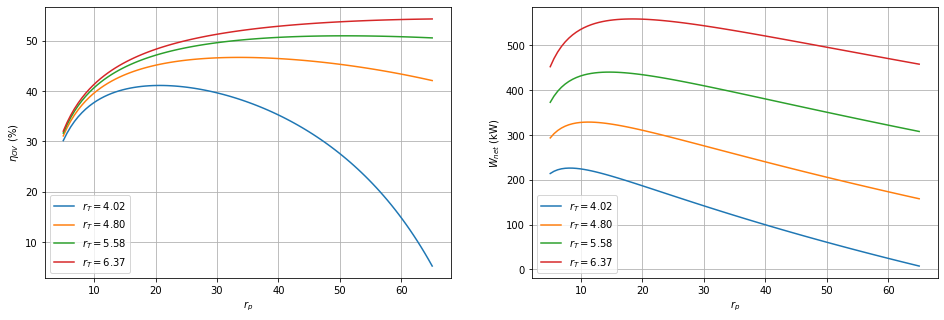

In [63]:

p_0 = 1.01325
T_0 = 298.15
eta_C = 0.90
eta_T = 0.92
rts = (np.linspace(900, 1600, 4) + T_0) / T_0
g = 1.4
gp = (g-1) / g
Cp = 1.005

rps = np.linspace(5, 65, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

for rt in rts:
    novs = 100*(eta_T * rt *(1 - rps**-gp) - (rps**gp - 1)/eta_C)/(rt - 1 - (rps**gp - 1)/eta_C)
    Wnet = Cp * T_0 * (eta_T * rt * (1 - rps**-gp) - (rps**gp - 1)/eta_C)

    ax1.plot(rps, novs, label=f'$r_T = {rt:.2f}$')
    ax2.plot(rps, Wnet, label=f'$r_T = {rt:.2f}$')


ax1.set_xlabel('$r_p$')
ax1.set_ylabel('$\eta_{OV}$ (%)')
ax1.legend()
ax1.grid()

ax2.set_xlabel('$r_p$')
ax2.set_ylabel('$W_{net}$ (kW)')
ax2.legend()
ax2.grid()

plt.savefig('pg_rT_variations.png')
plt.show()

1.007


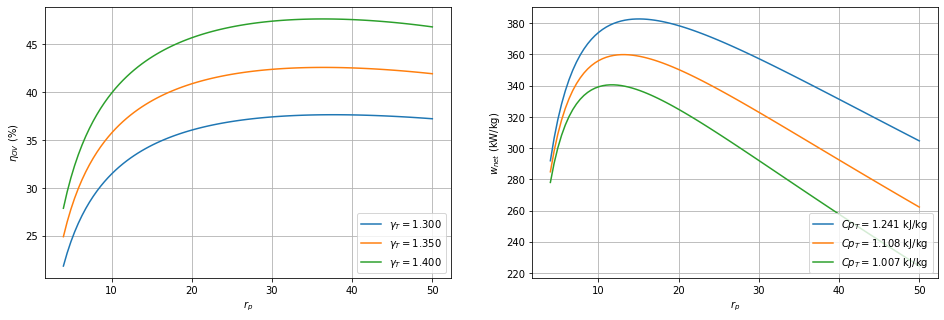

In [99]:
rps = np.linspace(4, 50, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
gci = 1.396
gti = 1.296
gms = np.linspace(1.3, 1.4, 3, endpoint=True)
gc = (gci-1) / gci
gt = (gti-1) / gti

rt = 1150 / T_0 + 1

## Source: https://www.engineeringtoolbox.com/air-specific-heat-capacity-d_705.html
data = np.loadtxt('air_table.txt', skiprows=3)
T_data = data[:, 0]
Cp_data = data[:,9]
G_data = data[:, -1]

def interp_fromT(T):
    return np.interp(T, T_data, Cp_data), np.interp(T, T_data, G_data)

def interp_fromG(G):
    return np.interp(G, G_data[::-1], Cp_data[::-1]) # X needs to be in acending order for some reason

Cpc = interp_fromG(1.4)
print(Cpc)

for g in gms:
    gt = (g-1) / g

    CpT = interp_fromG(g)
    r_Cp = CpT / Cpc
        
    novs = 100*(r_Cp * eta_T * rt *(1 - rps**-gt) - (rps**gc - 1)/eta_C)/(r_Cp * rt - 1 - (rps**gc - 1)/eta_C)
    Wnet = Cpc * T_0 * ( r_Cp * eta_T * rt * (1 - rps**-gt) - (rps**gc - 1)/eta_C)

    ax1.plot(rps, novs, label=f'$\gamma_T = {g:.3f}$')
    ax2.plot(rps, Wnet, label=f'$Cp_T = {CpT:.3f}$ kJ/kg')

    gtprev = gt


ax1.set_xlabel('$r_p$')
ax1.set_ylabel('$\eta_{OV}$ (%)')
ax1.legend()
ax1.legend(loc='lower right')
ax1.grid()

ax2.set_xlabel('$r_p$')
ax2.set_ylabel('$w_{net}$ (kW/kg)')
ax2.legend(loc='lower right')
ax2.grid()

plt.savefig('pg_combustor_exit_gamma_variation.png', dpi = 300)
plt.show()

In [106]:

rt = (1150 + 273.15 ) / T_0
gci = 1.396
gti = 1.296
gc = (gci-1) / gci
gt = (gti-1) / gti

CpT = interp_fromG(gti)
CpC = interp_fromG(gci)

r_Cp = CpT / CpC

rp = 16
novs = 100*(r_Cp * eta_T * rt *(1 - rp**-gt) - (rp**gc - 1)/eta_C)/(r_Cp * rt - 1 - (rp**gc - 1)/eta_C)
Wnet = CpC * T_0 * (r_Cp * eta_T * rt * (1 - rp**-gt) - (rp**gc - 1)/eta_C)

print(f'At rp = {rp:.2f}, rt = {rt:.3f}, gamma = {g:.3f}, eta_ov = {novs:.3f}%, W_net = {Wnet:.2f} kW')

At rp = 16.00, rt = 4.773, gamma = 1.400, eta_ov = 33.952%, W_net = 360.62 kW
